# Looking at channel profiles in the Killmade Burn

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 03/11/2020*

This notebook looks at some data from the Killmade Burn, a tributary to the Whiteadder Water, a small catchment in the Scottish Borders.

## Load the data

We are going to load the data using `geopandas`. 
`pandas` is a python packages for dealing with various datasets, and it is very good at handling csv data. `geopandas` builds on `pandas` so that spatial information is recognised by package. Before we do anything with the data we need to `import` these two python packages. 

In [1]:
import pandas as pd
import geopandas as gpd

Data that goes into `pandas` is called a *dataframe*. The dataframe holds the data but also the data column names.
To get a `geopandas` dataframe we first load a csv file into a `pandas` dataframe. I'll use the `head` command to show you what the first few rows of data look like:

In [2]:
df = pd.read_csv("el_study_chi_data_map.csv")
df.head()

,latitude,longitude,chi,elevation,flow_distance,drainage_area,source_key,basin_key
0,55.877436,-2.549256,9.1343,389.98,4230.0,46852.0,0,0
1,55.877454,-2.549224,9.1119,389.98,4227.2,46864.0,0,0
2,55.877472,-2.549224,9.0961,389.95,4225.2,46912.0,0,0
3,55.877490,-2.549224,9.0803,389.95,4223.2,48104.0,0,0
4,55.877507,-2.549192,9.0581,389.91,4220.3,48160.0,0,0


Now we read this into a `geopandas` dataframe:

In [3]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
print(gdf.head())

    latitude  longitude     chi  elevation  flow_distance  drainage_area  \
0  55.877436  -2.549256  9.1343     389.98         4230.0        46852.0   
1  55.877454  -2.549224  9.1119     389.98         4227.2        46864.0   
2  55.877472  -2.549224  9.0961     389.95         4225.2        46912.0   
3  55.877490  -2.549224  9.0803     389.95         4223.2        48104.0   
4  55.877507  -2.549192  9.0581     389.91         4220.3        48160.0   

   source_key  basin_key                   geometry  
0           0          0  POINT (-2.54926 55.87744)  
1           0          0  POINT (-2.54922 55.87745)  
2           0          0  POINT (-2.54922 55.87747)  
3           0          0  POINT (-2.54922 55.87749)  
4           0          0  POINT (-2.54919 55.87751)  


It is really easy to get data out of `pandas` and `geopandas` dataframes. Observe:

In [4]:
# You can get data using 
# both the name of the column after a full stop 
# or the column in quotes within brackets
print(gdf.chi)
print(gdf["chi"])

0        9.1343
1        9.1119
2        9.0961
3        9.0803
4        9.0581
          ...  
12170    1.6341
12171    1.6221
12172    1.6100
12173    1.5930
12174    1.5761
Name: chi, Length: 12175, dtype: float64
0        9.1343
1        9.1119
2        9.0961
3        9.0803
4        9.0581
          ...  
12170    1.6341
12171    1.6221
12172    1.6100
12173    1.5930
12174    1.5761
Name: chi, Length: 12175, dtype: float64


## Plot some points

`geopandas` has some basic plotting routines. Lets plot these points:

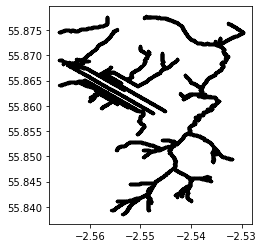

In [5]:
gdf.plot(marker='o', color="k", markersize=5);

Lets add some styling to this plot. I need to `import matplotlib` for this first.

Text(73.78845032375783, 0.5, 'latitude')

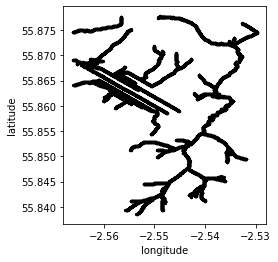

In [6]:
import matplotlib.pyplot as plt
gdf.plot(marker='o', color="k", markersize=5);
plt.xlabel("longitude")
plt.ylabel("latitude")

Those funny channels to the right are in the lake. We are only interested in the channels to the right. 
They actually have a different `basin_key` than the channels to the left. We can plot the basin numbers:

Text(73.78845032375783, 0.5, 'latitude')

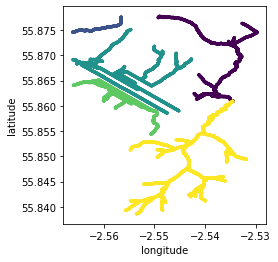

In [7]:
gdf.plot(marker='o', c=gdf.basin_key, markersize=5)
plt.xlabel("longitude")
plt.ylabel("latitude")

If you want to select only one basin, you can make a new dataframe like this:

Text(42.469137312988636, 0.5, 'latitude')

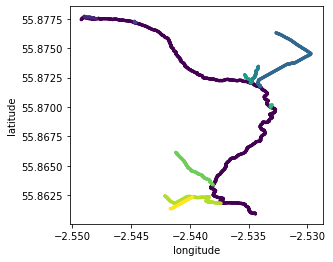

In [8]:
gdf_b0 = gdf[(gdf['basin_key'] == 0)]
gdf_b0.plot(marker='o', c=gdf_b0.source_key, markersize=5)
plt.xlabel("longitude")
plt.ylabel("latitude")

## Plot some profiles

Killmade Burn is basin 4. Basin 0 is also interesting (it is the on on the opposite side of the valley). 
We can plot these valleys by selecting the correct data:

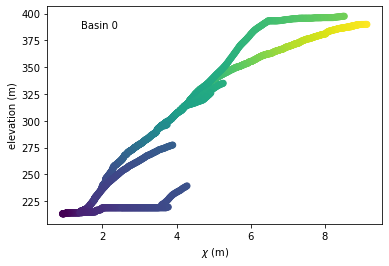

In [9]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]

fig = plt.figure()
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.elevation,c=gdf_b0.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")
ax.text(0.1,0.9,"Basin "+str(basin_0),transform=ax.transAxes)
fig.show()


We could add a second basin:

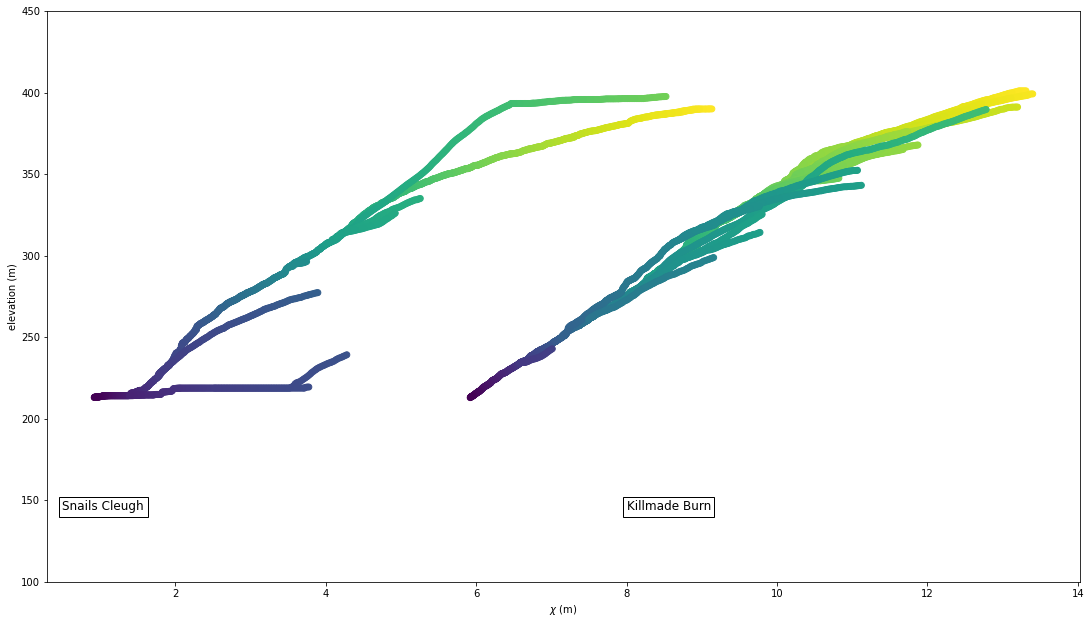

In [10]:
import numpy as np

basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.elevation,c=gdf_b0.flow_distance)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.chi,5),gdf_b4.elevation,c=gdf_b4.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")

plt.text(0.5, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(100,450)
fig.show()


We can also do this with the channel profile. 

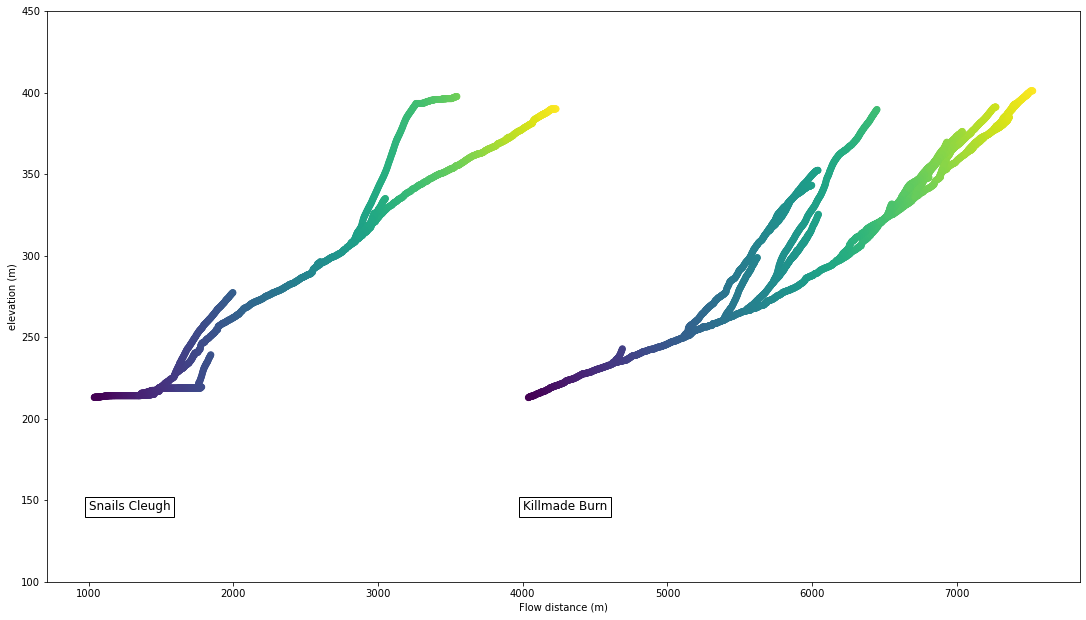

In [11]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.flow_distance,gdf_b0.elevation,c=gdf_b0.flow_distance)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.flow_distance,3000),gdf_b4.elevation,c=gdf_b4.flow_distance)
plt.xlabel("Flow distance (m)")
plt.ylabel("elevation (m)")

plt.text(1000, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(4000, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(100,450)
fig.show()


We can also isolate source keys

In [12]:
print(gdf_b4.head())

       latitude  longitude     chi  elevation  flow_distance  drainage_area  \
7882  55.839362  -2.555733  8.3116     401.04         4523.8        59624.0   
7883  55.839344  -2.555701  8.2915     401.03         4520.9        59636.0   
7884  55.839326  -2.555669  8.2714     401.03         4518.1        59652.0   
7885  55.839308  -2.555638  8.2514     401.03         4515.3        72952.0   
7886  55.839326  -2.555606  8.2330     401.03         4512.5        73164.0   

      source_key  basin_key                   geometry  
7882          35          4  POINT (-2.55573 55.83936)  
7883          35          4  POINT (-2.55570 55.83934)  
7884          35          4  POINT (-2.55567 55.83933)  
7885          35          4  POINT (-2.55564 55.83931)  
7886          35          4  POINT (-2.55561 55.83933)  


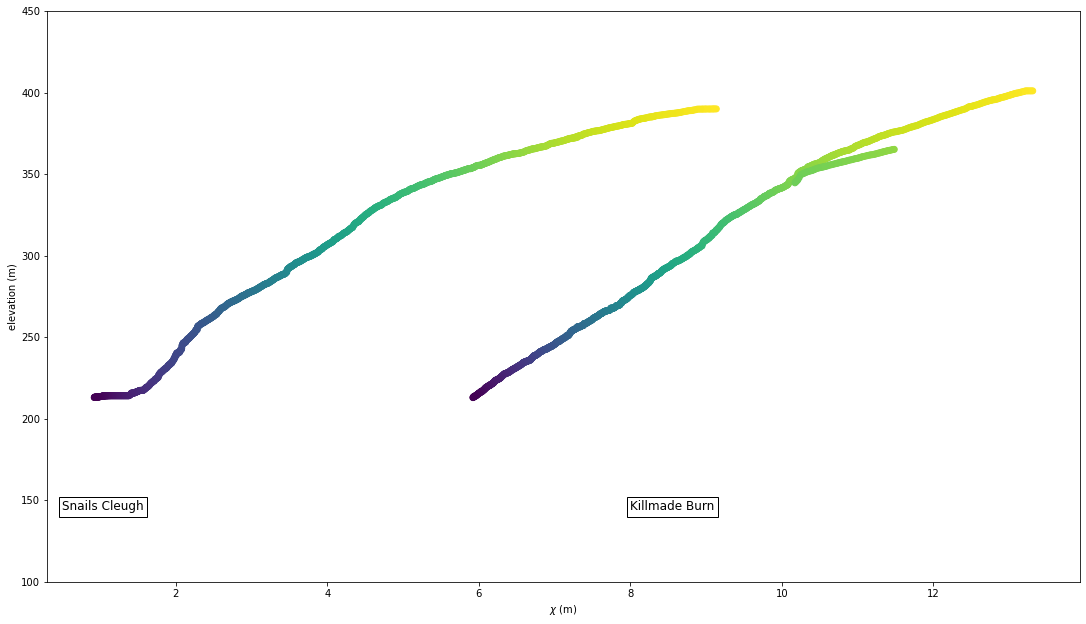

In [13]:
import numpy as np

basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0) & ((gdf['source_key'] == 0) | (gdf['source_key'] == 2)) ]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4) & ((gdf['source_key'] == 35) | (gdf['source_key'] == 43)) ]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.elevation,c=gdf_b0.flow_distance)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.chi,5),gdf_b4.elevation,c=gdf_b4.flow_distance)
plt.xlabel(r"$\chi$ (m)")
plt.ylabel("elevation (m)")

plt.text(0.5, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(100,450)
fig.show()


## Calculate the chi gradient

In the `channel_incision` directory you will find some notebooks about channel steepness. I'll summarize here:

* Channels tend to become gentler as you gain drainage area. If you look at landscapes we thing are steadliy eroding, the relasionship can be described with
$S = k_s A^{-\theta}$

* A number of studies have suggested $k_s$ correlates with erosion rates (measured with cosmogenics). 

* So we want to measure $k_s$ in landscape to use as a proxy for erosion rate. In the past, many authors used extracted this from Slope-Area data, but this is very noisy. 

* To reduce noise, we do a clever coordinate transformation that makes a coordiante, $\chi$, that incorporates drainage area. 

* This transformation is specifically designed so that the local slope in $\chi$-elevation space corresponds to $k_s$. 

* So, we are going to take the slope of $\chi$-elevation and see if there are any patterns.

First, we use the `gradient` function get the gradient between pixels.

* **WARNING**: *The way the data is organised, there are artifical jumps between source keys. So the data at the ends of each tributary is not correct.*

* **Explanation**: *When the data has finished a tributary, it jumps up to the headwaters of the next tributary, but the gradient function is not clever enough to realise this, so it just calculates a gradient between the bottom of one tributary and the top of the next one. This is nonsense, so the gradient data at the edges should be ignored).*

gdf["k_sn"] = np.gradient(gdf.elevation,gdf.chi)
gdf.head()

Now plot these data. 

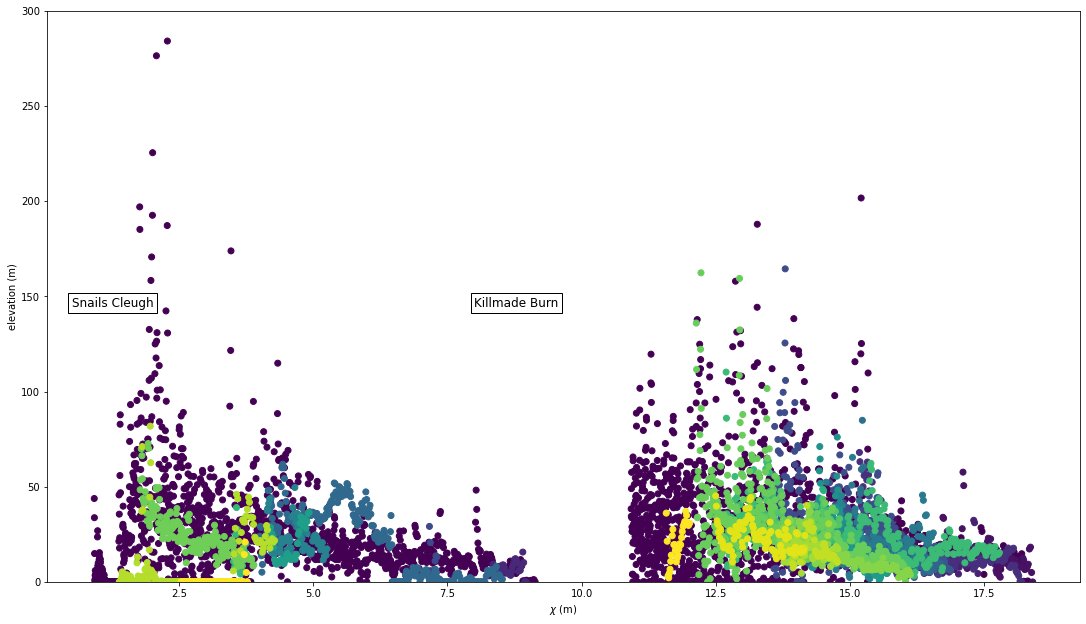

In [23]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.k_sn,c=gdf_b0.source_key)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.chi,10),gdf_b4.k_sn,c=gdf_b4.source_key)
plt.xlabel(r"$k_{sn}$")
plt.ylabel("elevation (m)")

plt.text(0.5, 150, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 150, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(0,300)
fig.show()

We can also smooth this data. `pandas` has lots of tools for smoothing data. You can use the `rolling` fnction to smooth the $k_{sn}$ values. Below I use a 25 pixel window. You can use different filters; in this case I use something called a `hamming` filter, which is too tedious to explain but if you really want to know about it there is always google. 

In [22]:
gdf['k_sn_smoothed'] = gdf['k_sn'].rolling(25,win_type='hamming').mean()

,latitude,longitude,chi,elevation,flow_distance,drainage_area,source_key,basin_key,geometry,k_sn,k_sn_smoother,k_sn_smoothed
0,55.877436,-2.549256,9.1343,389.98,4230.0,46852.0,0,0,POINT (-2.54926 55.87744),-0.000000,NaN,NaN
1,55.877454,-2.549224,9.1119,389.98,4227.2,46864.0,0,0,POINT (-2.54922 55.87745),1.113394,NaN,NaN
2,55.877472,-2.549224,9.0961,389.95,4225.2,46912.0,0,0,POINT (-2.54922 55.87747),0.949367,NaN,NaN
3,55.877490,-2.549224,9.0803,389.95,4223.2,48104.0,0,0,POINT (-2.54922 55.87749),0.749170,NaN,NaN
4,55.877507,-2.549192,9.0581,389.91,4220.3,48160.0,0,0,POINT (-2.54919 55.87751),0.743601,NaN,NaN


Okay, we will plot both the smoothed and the raw data. We can also isolate the sources (you can play with the `source_key` numbers). 

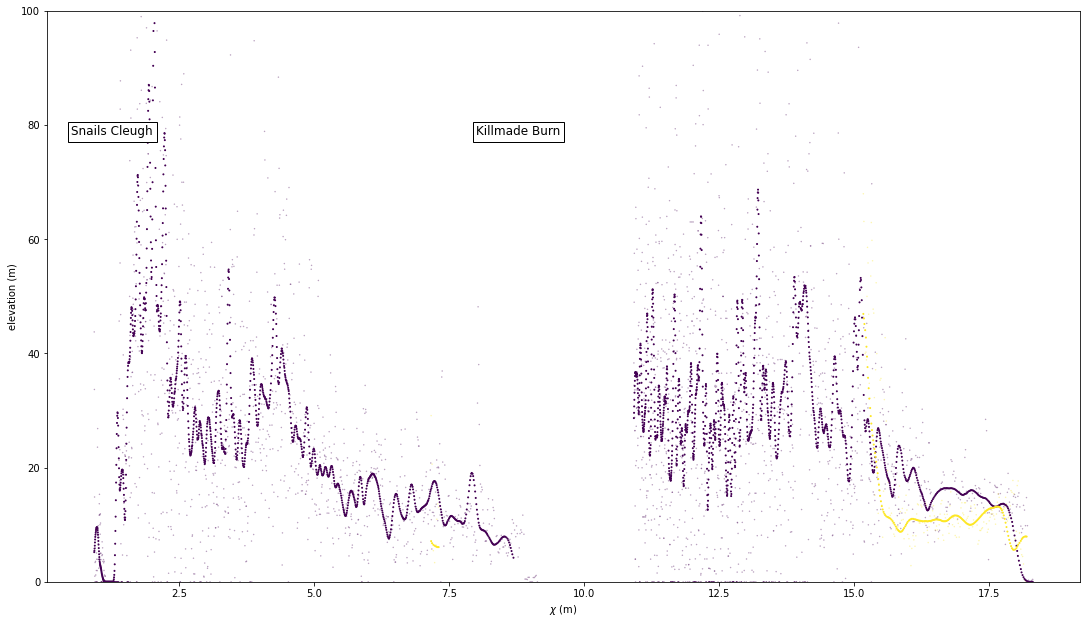

In [30]:
basin_0 = 0
gdf_b0 = gdf[(gdf['basin_key'] == basin_0)  & ((gdf['source_key'] == 0) | (gdf['source_key'] == 2)) ]
basin_4 = 4
gdf_b4 = gdf[(gdf['basin_key'] == basin_4)  & ((gdf['source_key'] == 35) | (gdf['source_key'] == 38)) ]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1,1)

plt.scatter(gdf_b0.chi,gdf_b0.k_sn,c=gdf_b0.source_key,alpha = 0.4,s=0.2)
plt.scatter(gdf_b0.chi,gdf_b0.k_sn_smoothed,c=gdf_b0.source_key,s=1)

# I am adding a chi distance of 8 to the chi coordiante to have the basins stack
plt.scatter(np.add(gdf_b4.chi,10),gdf_b4.k_sn,c=gdf_b4.source_key,alpha = 0.4,s=0.2)
plt.scatter(np.add(gdf_b4.chi,10),gdf_b4.k_sn_smoothed,c=gdf_b4.source_key,s=1)
plt.xlabel(r"$k_{sn}$")
plt.ylabel("elevation (m)")

plt.text(0.5, 80, "Snails Cleugh", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

plt.text(8, 80, "Killmade Burn", size=12,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(0., 0., 0.),
                   fc=(1., 1.0, 1.0),
                   )
        )

ax.set_ylim(0,100)
fig.show()

Okay, remember how I said the data can't be trused at the ends of the tributaries? Well, when we smooth over 25 pixels this messed up data gest smeared over 25 pixels. So in the tributaries you need to ignore the ends on only look at the middle pixels to see the $k_{sn}$ on that tributary. 